In [2]:
import pandas as pd
import pylab as pl
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
grb050525A = pd.read_csv("grb050525A.dat", sep=" ", header=None)

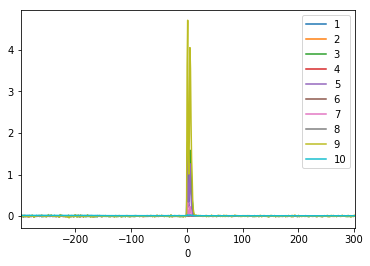

In [4]:
grb050525A.plot(x=0)

In [5]:
grb050525A.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-298.556,0.005023,0.008178,-0.001165,0.008340,0.009040,0.008142,0.013983,0.008230,0.026882,0.016446
1,-297.556,-0.005947,0.008011,0.008888,0.008477,0.014794,0.008025,0.010334,0.008280,0.028069,0.016401
2,-296.556,-0.005508,0.007847,0.001759,0.008327,-0.004056,0.007848,0.000811,0.008458,-0.006994,0.016249
3,-295.556,-0.001119,0.008253,-0.006670,0.008211,0.004374,0.008147,-0.010784,0.008375,-0.014198,0.016494
4,-294.556,0.006988,0.007975,-0.004426,0.008203,0.008548,0.007683,0.009081,0.008370,0.020191,0.016124


In [6]:
grb050525A = pd.read_csv("grb050525A_all.dat", sep=" ", header=None, names=[
    "filter", "time", "exposure", "mag", "magerr", "flux", "fluxerr", "None"], index_col=None)

In [7]:
grb050525A[["time","mag", "filter"]][60:90]

,time,mag,filter
60,215,13.70,U
61,299,14.08,U
62,419,14.47,U
63,890,15.29,U
64,975,15.32,U
65,12019,17.66,U
66,468,14.71,U
67,552,14.97,U
68,637,15.01,U
69,721,15.14,U


In [37]:
def linint(x, mag, earlier, later):
    x0 = earlier.logtime.values[-1]
    x1 = later.logtime.values[0]
    y0 = earlier.mag.values[-1]
    y1 = later.mag.values[0]
    y = y0 + (x - x0) * (y1 - y0) / (x1 - x0) 
    magdiff = (y - mag)
    return magdiff

In [38]:
mpl.colors.to_rgba("r", alpha=1)


(1.0, 0.0, 0.0, 1)

In [39]:
grb050525A["flux"] = pd.to_numeric(grb050525A["flux"], errors="coerce")
grb050525A["mag"] = pd.to_numeric(grb050525A["mag"], errors="coerce")
grb050525A["newmag"] = grb050525A["mag"]
grb050525A["uplimmag"] = np.nan * len(grb050525A)
grb050525A.loc[grb050525A[grb050525A.mag.isna()].index, "uplimmag"] = \
    grb050525A[grb050525A.mag.isna()].magerr
grb050525A["color"] = grb050525A["filter"].map({"V":"r", "B":"m", "U":"c", "W1":"purple", 
                                                "M2":"b", "W2":"k"})
grb050525A["upperlimit"] = [0] * len(grb050525A)

grb050525A.loc[grb050525A["mag"].isna(),  "upperlimit"] = 1

grb050525A["rgbcolor"] = grb050525A["color"].apply(lambda x: mpl.colors.to_rgba(x, 0.5))
grb050525A["logtime"] = np.log10(grb050525A["time"])
grb050525A["logflux"] = np.log10(grb050525A["flux"])

for c in grb050525A["filter"].unique():
    if c == "V": continue
    t0 = grb050525A[grb050525A["filter"] == c].logtime.values[0] 
    m0 = grb050525A[grb050525A["filter"] == c].mag.values[0]
    later = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime > t0]
    earlier = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime < t0]
    #print (t0, "\n", later, earlier)
    mdiff = linint(t0, m0, earlier, later)
    ind = grb050525A[grb050525A["filter"] == c].index
    grb050525A.loc[ind, "newmag"] += mdiff 
    grb050525A.loc[ind, "uplimmag"] -= mdiff 

#for f in grb050525A["mag"].values

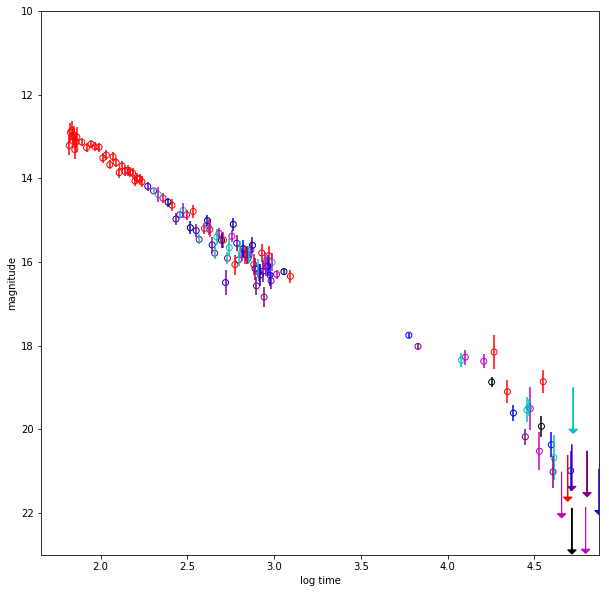

In [40]:
pl.figure(figsize=(10,10))
ind = grb050525A.magerr > 0#(grb050525A["filter"] == "V")+ (grb050525A["filter"]  == "B") + \
      #     (grb050525A["filter"]  == "U")
pl.errorbar(grb050525A["logtime"], grb050525A["newmag"], 
            alpha=1, yerr=grb050525A["magerr"], fmt='.', ms=0,
            ecolor=grb050525A["color"], fcolor=None)
pl.scatter(grb050525A["logtime"], grb050525A["newmag"], alpha=1, 
           edgecolor=grb050525A["color"], facecolors='none')
nuplim = grb050525A.mag.isna().sum()
for i in grb050525A[grb050525A.mag.isna()].index:
    pl.arrow(grb050525A.loc[i].logtime, 
         grb050525A.loc[i].uplimmag, 0, 1, fc=grb050525A.loc[i].color,
            head_width=0.05, head_length=0.1, ec=grb050525A.loc[i].color)
pl.ylim(23,10)
pl.ylabel("magnitude")
pl.xlabel("log time");

In [41]:
grb050525A[["filter", "time", "newmag", 
            "magerr", "upperlimit" ]]

,filter,time,newmag,magerr,upperlimit
0,V,66,13.210000,0.24,0
1,V,67,12.900000,0.23,0
2,V,68,12.860000,0.23,0
3,V,69,13.010000,0.23,0
4,V,70,12.970000,0.23,0
5,V,71,13.310000,0.23,0
6,V,72,13.130000,0.23,0
7,V,73,13.010000,0.23,0
8,V,78,13.130000,0.10,0
9,V,83,13.260000,0.10,0


In [42]:
grb050525A[["filter", "time", "newmag", 
            "magerr", "upperlimit" ]].rename({"newmag":"mag"}, axis=1).sort_values(by="time").to_csv("grb050525A.csv", index=False)

In [53]:
grb050525A_notna = grb050525A[["filter", "time", "logtime","mag", 
            "magerr", "upperlimit" ]].dropna()

In [54]:
y = grb050525A_notna.mag.values
y

array([13.21, 12.9 , 12.86, 13.01, 12.97, 13.31, 13.13, 13.01, 13.13,
       13.26, 13.18, 13.24, 13.25, 13.51, 13.44, 13.67, 13.48, 13.62,
       13.86, 13.7 , 13.83, 13.81, 13.84, 13.87, 14.06, 14.  , 14.01,
       14.08, 14.64, 14.79, 15.22, 15.47, 16.06, 15.83, 16.06, 15.78,
       15.85, 16.34, 18.15, 19.1 , 18.86, 14.79, 15.19, 15.51, 15.63,
       15.7 , 16.13, 16.03, 16.56, 16.44, 16.61, 18.59, 18.69, 19.82,
       20.84, 13.7 , 14.08, 14.47, 15.29, 15.32, 17.66, 14.71, 14.97,
       15.01, 15.14, 15.46, 18.85, 18.79, 19.99, 13.61, 14.18, 14.77,
       15.1 , 15.22, 15.26, 15.22, 15.88, 16.15, 15.76, 17.33, 19.49,
       20.33, 13.54, 14.32, 14.6 , 14.94, 15.84, 14.9 , 15.18, 15.51,
       15.57, 15.66, 17.1 , 18.96, 19.72, 20.34, 14.69, 15.3 , 15.13,
       15.6 , 15.22, 15.8 , 15.72, 16.43, 16.21, 16.35, 18.99, 20.05])

In [55]:
x = np.atleast_2d(grb050525A_notna.time)
x

array([[   66,    67,    68,    69,    70,    71,    72,    73,    78,
           83,    88,    93,    98,   103,   108,   113,   118,   123,
          128,   133,   138,   143,   148,   153,   158,   163,   168,
          173,   258,   342,   426,   511,   595,   680,   764,   849,
          933,  1243, 18575, 22163, 35638,   229,   313,   397,   482,
          571,   651,   735,   820,   904,  1034, 12671, 16182, 30031,
        33898,   215,   299,   419,   890,   975, 12019,   468,   552,
          637,   721,   805, 28664, 29380, 41040,   202,   286,   370,
          455,   539,   624,   708,   792,   877,   961,  6761, 28111,
        40585,   187,   272,   356,   440,   525,   609,   694,   778,
          863,   947,  5984, 24007, 39683, 51257,   245,   329,   413,
          498,   582,   666,   751,   835,   920,  1140, 17973, 34806]])

In [56]:
c = np.zeros((len(grb050525A_notna), len(grb050525A_notna)))
for i in range(len(grb050525A_notna)):
    c[i,i] = grb050525A_notna.magerr.values[i]
c = np.matrix(c), np.linalg.inv(c)

In [57]:
np.linalg.inv (x.T.dot(np.linalg.inv(c)).dot(x)).dot((x.T.dot(np.linalg.inv(c)).dot(y)))

ValueError: shapes (108,1) and (2,108,108) not aligned: 1 (dim 1) != 108 (dim 1)

In [59]:
y = grb050525A_notna.mag
s = grb050525A_notna.magerr
x = grb050525A_notna.logtime

In [74]:
import scipy as sp
from scipy import optimize
def line(x, a, b):
    """
    Takes two parameters (a and b) along with an array of x values. Returns y array.
    """
  
    return a * x + b
popt0, pcov0 = sp.optimize.curve_fit(line, x, y, p0=[2.5, 0], sigma=s)

print("fit parameters", popt0, "\n", 
      "covariance matrix\n", pcov0)
#f

fit parameters [2.30241424 8.8735603 ] 
 covariance matrix
 [[ 0.00265263 -0.00713928]
 [-0.00713928  0.02049531]]


In [75]:
np.sort(x)

array([1.81954394, 1.8260748 , 1.83250891, 1.83884909, 1.84509804,
       1.85125835, 1.8573325 , 1.86332286, 1.8920946 , 1.91907809,
       1.94448267, 1.96848295, 1.99122608, 2.01283722, 2.03342376,
       2.05307844, 2.07188201, 2.08990511, 2.10720997, 2.12385164,
       2.13987909, 2.15533604, 2.17026172, 2.18469143, 2.19865709,
       2.2121876 , 2.22530928, 2.2380461 , 2.27184161, 2.30535137,
       2.33243846, 2.35983548, 2.38916608, 2.41161971, 2.4345689 ,
       2.45636603, 2.47567119, 2.49554434, 2.5171959 , 2.53402611,
       2.55145   , 2.56820172, 2.59879051, 2.61595005, 2.62221402,
       2.6294096 , 2.64345268, 2.6580114 , 2.67024585, 2.68304704,
       2.69722934, 2.7084209 , 2.7201593 , 2.73158877, 2.74193908,
       2.75663611, 2.76492298, 2.77451697, 2.78461729, 2.79518459,
       2.80413943, 2.81358099, 2.82347423, 2.83250891, 2.84135947,
       2.85003326, 2.85793526, 2.86628734, 2.87563994, 2.88309336,
       2.8909796 , 2.89872518, 2.90579588, 2.91381385, 2.92168

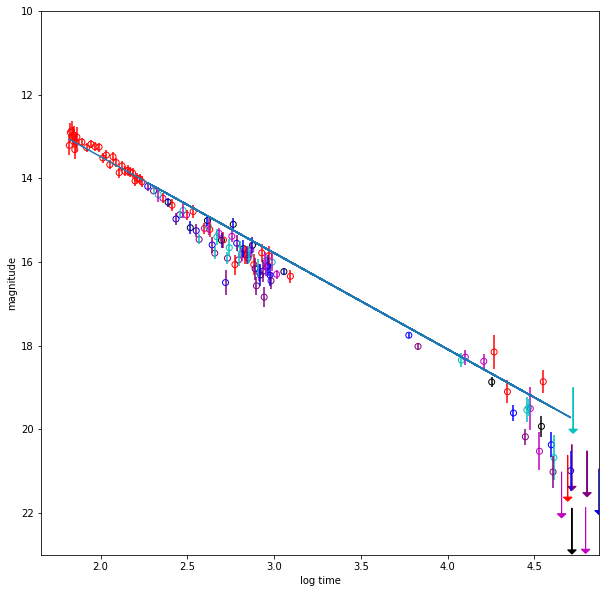

In [76]:
pl.figure(figsize=(10,10))
ind = grb050525A.magerr > 0#(grb050525A["filter"] == "V")+ (grb050525A["filter"]  == "B") + \
      #     (grb050525A["filter"]  == "U")
pl.errorbar(grb050525A["logtime"], grb050525A["newmag"], 
            alpha=1, yerr=grb050525A["magerr"], fmt='.', ms=0,
            ecolor=grb050525A["color"], fcolor=None)
pl.scatter(grb050525A["logtime"], grb050525A["newmag"], alpha=1, 
           edgecolor=grb050525A["color"], facecolors='none')
nuplim = grb050525A.mag.isna().sum()
for i in grb050525A[grb050525A.mag.isna()].index:
    pl.arrow(grb050525A.loc[i].logtime, 
         grb050525A.loc[i].uplimmag, 0, 1, fc=grb050525A.loc[i].color,
            head_width=0.05, head_length=0.1, ec=grb050525A.loc[i].color)
pl.plot(x, popt0[0] * x + popt0[1])
pl.ylim(23,10)
pl.ylabel("magnitude")
pl.xlabel("log time");

In [77]:
print ("line model - no uncertainties")

print("slope = {:.2} +/- {:.2}".format(popt0[0], np.sqrt(pcov0[0,0])))
print("intercept = {:.2} +/- {:.2}".format(popt0[1], np.sqrt(pcov0[1,1])))
print("parameters covariance = {:.2}".format(pcov0[1,0]))


line model - no uncertainties
slope = 2.3 +/- 0.052
intercept = 8.9 +/- 0.14
parameters covariance = -0.0071


In [62]:
def log_likelihood(theta, x, y, yerr):
    m, b= theta
    model = m * x + b
    sigma2 = yerr**2 + model**2
    return -0.5*np.sum((y-model)**2/sigma2)

def log_prior(theta):
    m, b= theta
    if -5.0 < m < 5 and -20 < b < 20.0 :
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [63]:
pos = popt0 + 1e-4 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, 
                                log_probability, args=(x,y,s))

sampler.run_mcmc(pos, 2000, progress=True);

NameError: name 'emcee' is not defined